In [3]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import plotly.express as px

In [4]:
df=pd.read_csv("C:\\Users\\djo16\\Cognifyz\\Dataset .csv")
print(df.head())

   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [16]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

# Task: Restaurant Ratings

**Analyze the distribution of aggregate ratings and determine the most common rating range.**

In [9]:
df = df.dropna(subset=['Aggregate rating', 'Votes'])

In [22]:
print(df['Aggregate rating'].unique())

[4.8 4.5 4.4 4.9 4.  4.2 4.3 3.6 4.7 3.  3.8 3.7 3.2 3.1 0.  4.1 3.3 4.6
 3.9 3.4 3.5 2.2 2.9 2.4 2.6 2.8 2.1 2.7 2.5 1.8 2.  2.3 1.9]


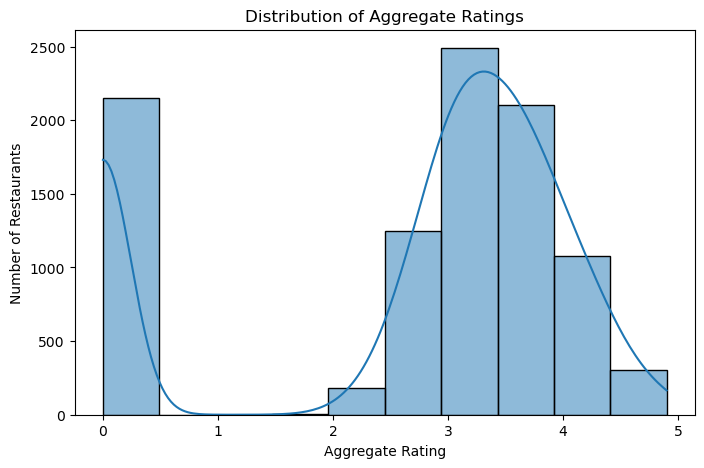

In [28]:
plt.figure(figsize=(8,5))
sn.histplot(df['Aggregate rating'], bins=10, kde=True)
plt.title('Distribution of Aggregate Ratings')
plt.xlabel('Aggregate Rating')
plt.ylabel('Number of Restaurants')
plt.show()

**Calculate the average number of votes received by restaurants.**

In [32]:
rating_scale = pd.cut(df['Aggregate rating'], bins=[0, 1, 2, 3, 4, 5], include_lowest=True)

In [34]:
rating_distribution = rating_scale.value_counts().sort_index()

In [36]:
print(rating_distribution)

Aggregate rating
(-0.001, 1.0]    2148
(1.0, 2.0]         10
(2.0, 3.0]       1891
(3.0, 4.0]       4388
(4.0, 5.0]       1114
Name: count, dtype: int64


In [38]:
most_common_range = rating_distribution.idxmax()
most_common_range

Interval(3.0, 4.0, closed='right')

In [42]:
average_votes = df['Votes'].mean()
average_votes

156.909747670401

# Task: Cuisine Combination

**Identify the most common combinations ofcuisines in the dataset**

In [44]:
df = df.dropna(subset=['Cuisines', 'Aggregate rating'])

In [46]:
df['Cuisines']

0             French, Japanese, Desserts
1                               Japanese
2       Seafood, Asian, Filipino, Indian
3                        Japanese, Sushi
4                       Japanese, Korean
                      ...               
9546                             Turkish
9547     World Cuisine, Patisserie, Cafe
9548              Italian, World Cuisine
9549                     Restaurant Cafe
9550                                Cafe
Name: Cuisines, Length: 9542, dtype: object

In [50]:
common_combinations = df['Cuisines'].value_counts()

In [54]:
print("Top 10 Cuisine Combinations:")
common_combinations.head(10)

Top 10 Cuisine Combinations:


Cuisines
North Indian                      936
North Indian, Chinese             511
Chinese                           354
Fast Food                         354
North Indian, Mughlai             334
Cafe                              299
Bakery                            218
North Indian, Mughlai, Chinese    197
Bakery, Desserts                  170
Street Food                       149
Name: count, dtype: int64

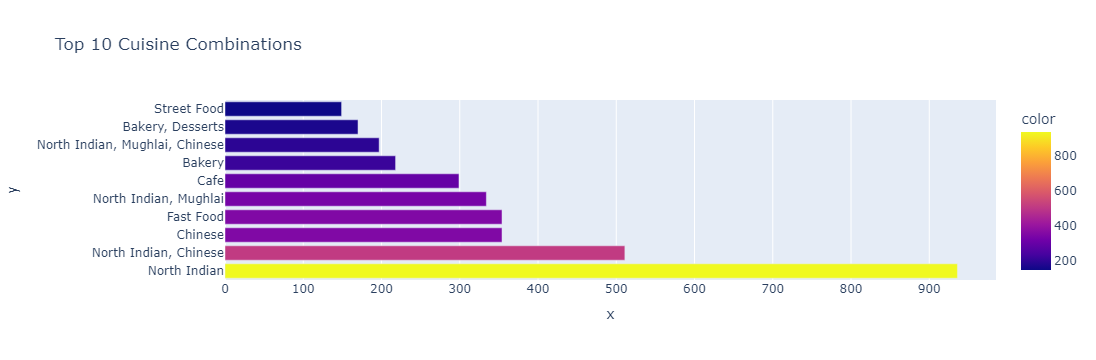

In [174]:
fig = px.bar(
    x=common_combinations.head(10).values, 
    y=common_combinations.head(10).index, orientation='h', 
    title='Top 10 Cuisine Combinations', 
    color=common_combinations.head(10).values, 
    color_continuous_scale='plasma', 
    height=600)

fig.show()


**Determine if certain cuisine combinationstend to have higher ratings.**

In [72]:
df=df.dropna(subset=['Cuisines','Aggregate rating'])

In [74]:
cuisine_by_ratings = df.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending=False)
print("Cusines combo by highest ratings")
cuisine_by_ratings 

Cusines combo by highest ratings


Cuisines
Italian, Deli                     4.9
Hawaiian, Seafood                 4.9
American, Sandwich, Tea           4.9
Continental, Indian               4.9
European, Asian, Indian           4.9
                                 ... 
Fast Food, Desserts, Beverages    0.0
Fast Food, Chinese, Burger        0.0
Cafe, French                      0.0
Seafood, Mughlai, North Indian    0.0
Fast Food, Mughlai, Armenian      0.0
Name: Aggregate rating, Length: 1825, dtype: float64

In [76]:
cuisine_by_ratings.head(12)

Cuisines
Italian, Deli               4.9
Hawaiian, Seafood           4.9
American, Sandwich, Tea     4.9
Continental, Indian         4.9
European, Asian, Indian     4.9
European, Contemporary      4.9
European, German            4.9
BBQ, Breakfast, Southern    4.9
American, Coffee and Tea    4.9
Sunda, Indonesian           4.9
American, Burger, Grill     4.9
Mughlai, Lucknowi           4.9
Name: Aggregate rating, dtype: float64

# Task: Geographic Analysis

**Plot the locations of restaurants on a map using longitude and latitude coordinates.**

In [78]:
df = df.dropna(subset=['Latitude', 'Longitude'])


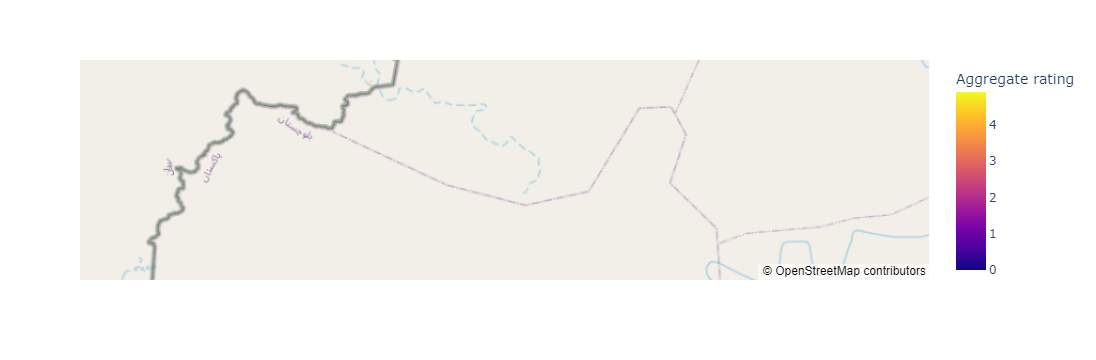

In [88]:
fig = px.scatter_mapbox(
    df,
    lat="Latitude",
    lon="Longitude",
    hover_name="Restaurant Name",      
    color="Aggregate rating",  
    size="Votes",
    mapbox_style="open-street-map",
    zoom=10,
    height=600
)
fig.show()

**Identify any patterns or clusters of restaurants in specific areas.**

In [96]:
from sklearn.cluster import KMeans

coordinates = df[['Latitude', 'Longitude']]
kmeans = KMeans(n_clusters=5, random_state=42)
df['cluster'] = kmeans.fit_predict(coordinates)

In [97]:
df['cluster'] = df['cluster'].astype(str)

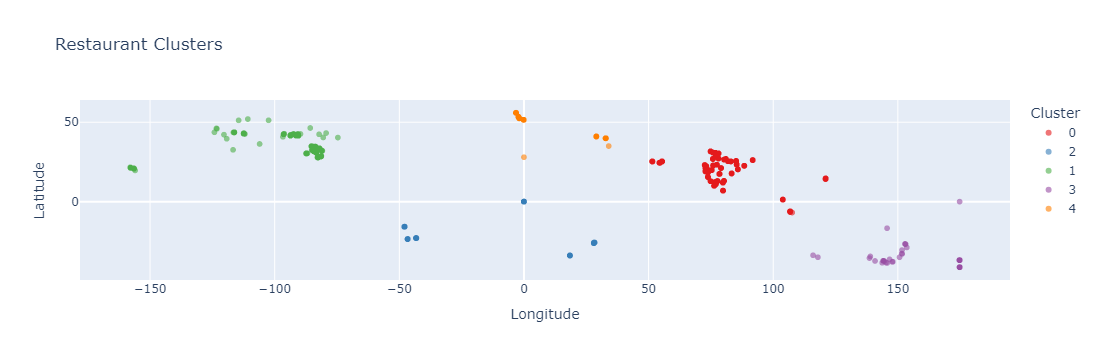

In [100]:
import plotly.express as px
fig = px.scatter(
    df, 
    x='Longitude', y='Latitude', 
    color='cluster', title='Restaurant Clusters', 
    labels={'Longitude': 'Longitude', 'Latitude': 'Latitude', 'cluster': 'Cluster'}, 
    color_discrete_sequence=px.colors.qualitative.Set1, opacity=0.6)
fig.show()

# Task: Restaurant Chains

**Identify if there are any restaurant chains present in the dataset.**

In [102]:
df.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,cluster
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,0
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,0


In [104]:
chain_counts = df['Restaurant Name'].value_counts()

In [106]:
chains = chain_counts[chain_counts > 1]
chains

Restaurant Name
Cafe Coffee Day                   83
Domino's Pizza                    79
Subway                            63
Green Chick Chop                  51
McDonald's                        48
                                  ..
Zaika Kathi Rolls                  2
The Night Owl                      2
The Cheesecake Factory             2
New Kadimi                         2
Ceviche Tapas Bar & Restaurant     2
Name: count, Length: 734, dtype: int64

In [114]:
print (chains.head(50).index)

Index(['Cafe Coffee Day', 'Domino's Pizza', 'Subway', 'Green Chick Chop',
       'McDonald's', 'Keventers', 'Pizza Hut', 'Giani', 'Baskin Robbins',
       'Barbeque Nation', 'Giani's', 'Barista', 'Dunkin' Donuts',
       'Pind Balluchi', 'Costa Coffee', 'Wah Ji Wah', 'Twenty Four Seven',
       'Sagar Ratna', 'Pizza Hut Delivery', 'Starbucks', 'KFC',
       'Republic of Chicken', 'Chaayos', 'Haldiram's', 'Burger King',
       'Shree Rathnam', 'Aggarwal Sweets', 'Frontier', 'Bikanervala',
       'Moti Mahal Delux', 'Bikaner Sweets', 'Behrouz Biryani', 'Karim's',
       '34, Chowringhee Lane', 'Chicago Pizza', 'Apni Rasoi', 'Burger Point',
       'Wow! Momo', 'Madras Cafe', 'Gopala', 'Nirula's Ice Cream',
       'Sardar A Pure Meat Shop', 'Yo! China', 'Shama Chicken Corner',
       'Berco's', 'Cocoberry', 'Ovenstory Pizza', 'Angels in my Kitchen',
       'Kebab Xpress', 'Faasos'],
      dtype='object', name='Restaurant Name')


**Analyze the ratings and popularity of different restaurant chains.**

In [116]:
chain_res_names = chains.index.tolist()

In [122]:
chain_df = df[df['Restaurant Name'].isin(chain_res_names)]

In [138]:
chain_briefs = chain_df.groupby('Restaurant Name').agg({
    'Aggregate rating': 'mean',
    'Votes': 'sum',
    'Restaurant Name': 'count'  
})

In [148]:
chain_briefs = chain_briefs.rename(columns={'Restaurant Name': 'Num_of_outlets', 'Votes': 'Total_votes'})
chain_briefs

,Aggregate rating,Total_votes,Num_of_outlets
Restaurant Name,,,
10 Downing Street,4.000000,670,2
221 B Baker Street,3.366667,215,3
34 Parkstreet Lane,3.050000,31,2
"34, Chowringhee Lane",2.791667,777,12
4700BC Popcorn,3.500000,176,2
...,...,...,...
Zaika,2.850000,245,4
Zaika Kathi Rolls,1.500000,16,2
Zizo,3.866667,1371,3


In [154]:
chain_briefs.sort_values(by='Total_votes', ascending=False)


,Aggregate rating,Total_votes,Num_of_outlets
Restaurant Name,,,
Barbeque Nation,4.353846,28142,26
AB's - Absolute Barbecues,4.825000,13400,4
Big Chill,4.475000,10853,4
Farzi Cafe,4.366667,10098,6
Truffles,3.950000,9682,2
...,...,...,...
Bikaner Misthan Bhandar,0.000000,0,2
Aap Ki Khatir,0.000000,0,2
Street Cafe,0.000000,0,2


In [158]:
top_by_votes = chain_briefs.sort_values(by='Total_votes', ascending=False)

print(top_by_votes[['Aggregate rating', 'Total_votes', 'Num_of_outlets']].head(10))

                           Aggregate rating  Total_votes  Num_of_outlets
Restaurant Name                                                         
Barbeque Nation                    4.353846        28142              26
AB's - Absolute Barbecues          4.825000        13400               4
Big Chill                          4.475000        10853               4
Farzi Cafe                         4.366667        10098               6
Truffles                           3.950000         9682               2
Chili's                            4.580000         8156               5
Joey's Pizza                       4.250000         7807               2
Big Yellow Door                    4.266667         7511               3
Saravana Bhavan                    4.133333         7238               3
Starbucks                          3.805556         7139              18
